# Ford GoBike Analysis by Craig Fleischman

***

<h3> Problem Statement </h3>

You're a data scientist at Ford GoBike (https://www.fordgobike.com/), the company running Bay Area Bikeshare. You are trying to increase ridership, and you want to offer deals through the mobile app to do so. What deals do you offer though? Currently, your company has three options: a flat price for a single one-way trip, a day pass that allows unlimited 30-minute rides for 24 hours and an annual membership.

Through this project, you will answer these questions:  
- What are the 5 most popular trips that you would call "commuter trips"?  
- What are your recommendations for offers (justify based on your findings)?  

<h3>Recommendations to increase riders and revenue: </h3>

**Customer Segments**:  
There are 2 groups of customers; **commuters** (people going to and from work) that take shorter trips (~9 mins on average) and then there are **ad-hoc** customers.  Commuters are subscription holders.  Ad-hoc customers take longer rides (6.1x) and take most of their trips during the weekends.  Ad-hoc customers have less trips, but have more total minutes used per year than commuters (~8.4M vs. ~8.2M).  Ad-hoc customers could be considered vacationers and also a small percentage of the population that are commuters, but do not have a subscription.

**Specific Actions**:  
1) Target pricing by customer group.  
&emsp;**a)** The ad-hoc group will ride the most total minutes and are probably less price sensitivity.

&emsp;**-Day pass** that ends at midnight, regardless of start time.  (The bike needs to get back to the station in time for the Monday morning commute.)  
&emsp;**-30 minute pass (with excess minutes charged per minute)**  
&emsp;**-120 minute pass (with excess minutes charged per minute)**  

&emsp;**b)** The membership group trip average is 9.4 minutes, with > 95% of all trips less than 30 minutes.  
&emsp;**-Annual Membership** Provides 60 minutes free per day.  
&emsp;**-Monthly Membership** Provides 60 minutes free per day.  (The monthly price will be higher than the annual / 12 price.)  

2) Adjust bike quantities to move excess supply to other bike stations that are running out.  

3) Purchase additional bikes where stations are regularly empty. The Top 10 stations report with the most empty bike readings is a good place to use additional bikes. They total more than ~338,000 empty readings.  

***

# Background Informational Queries

<h3>Q1: Which days have the most trips?   </h3>

**Answer 1:**  
Monday through Friday are the busiest days with ~60,000 trips on average per day.  

<h3>Q2: Which trips have the longest duration?  </h3>

**Answer 2:**  
Saturday and Sunday have the longest average trips (~11 mins), while the mideweek trips average ~9mins.  

**Assumptions:**   
<body> - AM commute:  starts at 4am to 9am,  end at 10am  </body>  
<body> - PM commute:  starts at 4pm to 9pm,  end at 10pm </body>  
<body> - Duration > 2 minutes </body>  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT EXTRACT(DAYOFWEEK from start_date), count(start_date), trunc(avg(duration_sec)/60,1) as duration_mins FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE EXTRACT(HOUR from start_date) >= 4 and EXTRACT(HOUR from start_date) <= 9 and EXTRACT(HOUR from end_date) <= 10 and duration_sec > 120 GROUP BY EXTRACT(DAYOFWEEK from start_date) ORDER BY 1' > result1.csv
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT EXTRACT(DAYOFWEEK from start_date), count(start_date), trunc(avg(duration_sec)/60,1) as duration_mins FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE EXTRACT(HOUR from start_date) >= 16 and EXTRACT(HOUR from start_date) <= 19 and EXTRACT(HOUR from end_date) <= 20 and duration_sec > 120 GROUP BY EXTRACT(DAYOFWEEK from start_date) ORDER BY 1' > result2.csv

Waiting on bqjob_r50381807b6d602c_00000168bc6af165_1 ... (0s) Current status: DONE    

In [3]:
df_daily_am=pd.read_csv('result1.csv')
df_daily_pm=pd.read_csv('result2.csv')

In [4]:
df_daily_am

,f0_,f1_,duration_mins
0,1,4979,21.9
1,2,60237,9.3
2,3,66620,9.2
3,4,64545,9.4
4,5,62136,9.4
5,6,53975,9.5
6,7,6225,18.8


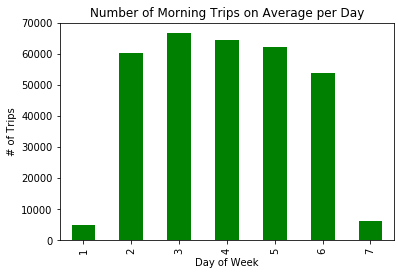

In [5]:
ax = plt.gca()
df_daily_am.plot(kind='bar', x='f0_', y='f1_', color='green', ax=ax)
plt.xlabel('Day of Week')
plt.ylabel('# of Trips')
plt.title('Number of Morning Trips on Average per Day')
ax.get_legend().remove()
plt.show()

In [6]:
df_daily_pm

,f0_,f1_,duration_mins
0,1,13078,27.9
1,2,63417,11.7
2,3,66932,11.7
3,4,64641,11.3
4,5,61590,11.9
5,6,53040,13.7
6,7,15012,29.4


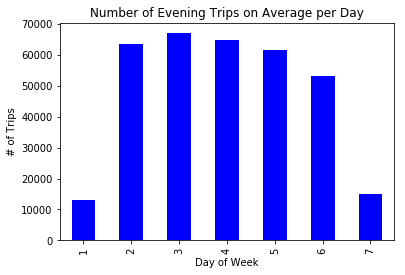

In [7]:
ax = plt.gca()
df_daily_pm.plot(kind='bar', x='f0_', y='f1_', color='blue', ax=ax)
plt.xlabel('Day of Week')
plt.ylabel('# of Trips')
plt.title('Number of Evening Trips on Average per Day')
ax.get_legend().remove()
plt.show()

<h3> Q3:  What are the most popular Morning and Evening Commuter Trips?</h3>

**Answer 3:**  
See below.  

**Assumptions:**   
<body> - AM commute:  starts 4am to 9am,  end at 10am </body>  
<body> - PM commute:  starts 4pm to 9pm,  end at 10pm </body>  
<body> - Weekdays (Monday - Friday) </body>  
<body> - Account Type = Subscribers </body>  
<body> - Duration > 2 minutes </body>

In [8]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT start_station_name, end_station_name, count(start_date) FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE EXTRACT(DAYOFWEEK from start_date) >= 2 and EXTRACT(DAYOFWEEK from start_date) <= 6 and EXTRACT(HOUR from start_date) >= 4 and EXTRACT(HOUR from start_date) <= 9 and EXTRACT(HOUR from end_date) <= 10 and subscriber_type = "Subscriber" and duration_sec > 120 GROUP BY start_station_name, end_station_name ORDER BY 3 DESC limit 5' > result3.csv
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT start_station_name, end_station_name, count(start_date) FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE EXTRACT(DAYOFWEEK from start_date) >= 2 and EXTRACT(DAYOFWEEK from start_date) <= 6 and EXTRACT(HOUR from start_date) >= 16 and EXTRACT(HOUR from start_date) <= 21 and EXTRACT(HOUR from end_date) <= 22 and subscriber_type = "Subscriber" and duration_sec > 120 GROUP BY start_station_name, end_station_name ORDER BY 3 DESC limit 5' > result4.csv

Waiting on bqjob_r15e8c652dcf93804_00000168bc6b0a70_1 ... (0s) Current status: DONE   

In [9]:
df_top_5am_trips=pd.read_csv('result3.csv')
df_top_5pm_trips=pd.read_csv('result4.csv')

### Answer 3a: Top 5 Morning Weekday Commutes

In [10]:
df_top_5am_trips

,start_station_name,end_station_name,f0_
0,Harry Bridges Plaza (Ferry Building),2nd at Townsend,4750
1,San Francisco Caltrain (Townsend at 4th),Temporary Transbay Terminal (Howard at Beale),3809
2,Steuart at Market,2nd at Townsend,3774
3,San Francisco Caltrain (Townsend at 4th),Embarcadero at Folsom,3593
4,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,3544


### Answer 3b: Top 5 Evening Weekday Commutes

In [11]:
df_top_5pm_trips

,start_station_name,end_station_name,f0_
0,2nd at Townsend,Harry Bridges Plaza (Ferry Building),4267
1,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),4174
2,Embarcadero at Sansome,Steuart at Market,4070
3,2nd at South Park,Market at Sansome,3689
4,Market at 10th,San Francisco Caltrain 2 (330 Townsend),3623


<h3> Q4:  Which type of customer takes longer trips?</h3>

**Answer 4:**  
Non subscribers take longer trips (61.9 mins vs. 9.7 mins).  Subscribers take 6.1 times more trips on average.  Non-subscribers have total trips of ~8.4 million minutes while subscribers have a total of ~8.2 million minutes.

In [12]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT subscriber_type, count(*) as count, trunc(AVG(duration_sec)/60, 1) AS avg_duration FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY subscriber_type' > result5.csv

Waiting on bqjob_r75a517df1311fda4_00000168bc6b1618_1 ... (0s) Current status: DONE   

In [13]:
df_subscription1=pd.read_csv('result5.csv')
df_subscription1

,subscriber_type,count,avg_duration
0,Customer,136809,61.9
1,Subscriber,846839,9.7


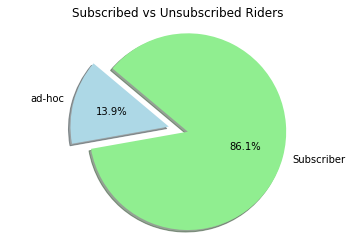

In [14]:
labels = ['ad-hoc', 'Subscriber']
sizes = df_subscription1['count']
colors = ['lightblue', 'lightgreen']
explode = (0.2, 0)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, )
plt.title('Subscribed vs Unsubscribed Riders')
plt.axis('equal')
plt.show()

In [15]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT subscriber_type as subscriber, EXTRACT(DAYOFWEEK from start_date), count(start_date) as count, trunc(avg(duration_sec)/60,1) as duration_mins, trunc(count(start_date)*avg(duration_sec)/60, 0) as total_mins FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY subscriber_type, EXTRACT(DAYOFWEEK from start_date) ORDER BY 1, 2' > result6.csv

Waiting on bqjob_rb8fe83291bfcc5e_00000168bc6b2286_1 ... (0s) Current status: DONE   

In [16]:
df_subscription2=pd.read_csv('result6.csv')

In [17]:
df_subscription2

,subscriber,f0_,count,duration_mins,total_mins
0,Customer,1,25908,68.5,1774790.0
1,Customer,2,15142,54.1,820562.0
2,Customer,3,14737,51.9,766287.0
3,Customer,4,15237,51.7,788099.0
4,Customer,5,16612,53.8,895160.0
5,Customer,6,19929,60.4,1205493.0
6,Customer,7,29244,76.2,2228994.0
7,Subscriber,1,25467,11.3,288337.0
8,Subscriber,2,154795,9.5,1478265.0
9,Subscriber,3,169668,9.4,1601178.0


In [18]:
df_cust = df_subscription2[(df_subscription2.subscriber == "Customer")]
df_sub = df_subscription2[(df_subscription2.subscriber != "Customer")]

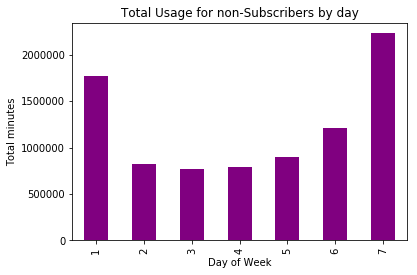

In [19]:
ax = plt.gca()
df_cust.plot(kind='bar', x='f0_', y='total_mins', color='purple', ax=ax)
plt.xlabel('Day of Week')
plt.ylabel('Total minutes')
plt.title('Total Usage for non-Subscribers by day')
ax.get_legend().remove()
plt.show()

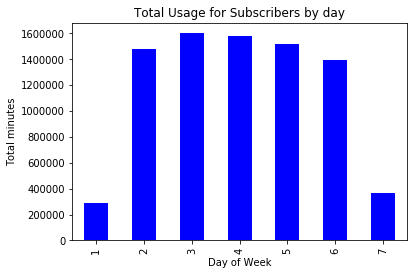

In [20]:
ax = plt.gca()
df_sub.plot(kind='bar', x='f0_', y='total_mins', color='blue', ax=ax)
plt.xlabel('Day of Week')
plt.ylabel('Total minutes')
plt.title('Total Usage for Subscribers by day')
ax.get_legend().remove()
plt.show()

<h3> Q5:  What are the top 10 empty stations</h3>

**Answer 5:**  
See below.

In [21]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT name AS Station_name, count(*) AS Total_Empty_Readings FROM `bigquery-public-data.san_francisco.bikeshare_status` as status INNER JOIN `bigquery-public-data.san_francisco.bikeshare_stations` as stations ON status.station_id=stations.station_id WHERE status.bikes_available=0 GROUP BY name ORDER BY count(*) DESC LIMIT 10' > result7.csv

Waiting on bqjob_r722647e555893f4e_00000168bc6b2f5e_1 ... (0s) Current status: DONE   

In [22]:
df_empty_stations=pd.read_csv('result7.csv')

In [23]:
df_empty_stations

,Station_name,Total_Empty_Readings
0,2nd at Folsom,44844
1,Commercial at Montgomery,44728
2,Embarcadero at Vallejo,35903
3,Embarcadero at Sansome,32980
4,Clay at Battery,32505
5,San Francisco Caltrain (Townsend at 4th),32027
6,Grant Avenue at Columbus Avenue,31733
7,Market at 4th,30800
8,Howard at 2nd,27938
9,Broadway St at Battery St,25496


<h3> Q6:  How many morning commutes are <= 30 minutes?</h3>

**Answer 6:**  
On average ~60,000 trips per weekday.  See below.

In [24]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT EXTRACT(DAYOFWEEK from start_date), count(*) FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE EXTRACT(DAYOFWEEK from start_date) >= 2 and EXTRACT(DAYOFWEEK from start_date) <= 6 and EXTRACT(HOUR from start_date) >= 4 and EXTRACT(HOUR from start_date) <= 9 and EXTRACT(HOUR from end_date) <= 10 and duration_sec/60 <= 30 GROUP BY EXTRACT(DAYOFWEEK from start_date) ORDER BY 1' > result8.csv

Waiting on bqjob_r246dea297e6de8d5_00000168bc6b3b69_1 ... (0s) Current status: DONE   

In [25]:
commuters_30=pd.read_csv('result8.csv')

In [26]:
commuters_30

,f0_,f1_
0,2,60237
1,3,66707
2,4,64576
3,5,62108
4,6,53958


<h3> Q7:  How many morning commutes are > 30 minutes?</h3>

**Answer 7:**  
On average 440 trips per weekday.  See below.

In [27]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT EXTRACT(DAYOFWEEK from start_date), count(*) FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE EXTRACT(DAYOFWEEK from start_date) >= 2 and EXTRACT(DAYOFWEEK from start_date) <= 6 and EXTRACT(HOUR from start_date) >= 4 and EXTRACT(HOUR from start_date) <= 9 and EXTRACT(HOUR from end_date) <= 10 and duration_sec/60 > 30 GROUP BY EXTRACT(DAYOFWEEK from start_date) ORDER BY 1' > result9.csv

Waiting on bqjob_r178761ca01423410_00000168bc6b475f_1 ... (0s) Current status: DONE   

In [28]:
commuters_greater_30=pd.read_csv('result9.csv')

In [29]:
commuters_greater_30

,f0_,f1_
0,2,450
1,3,395
2,4,416
3,5,479
4,6,446
